<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/Clasificaci%C3%B3n_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Cargando el conjunto de datos

In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
# Índices de las palabras
word_index = reuters.get_word_index()

In [4]:
print('Trainning data:', len(train_data))
print('Testing data:', len(test_data))

Trainning data: 8982
Testing data: 2246


##2. Preprocesamiento del conjunto de datos

In [5]:
import numpy as np

def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1
    return results

In [6]:
# Vectorizamos el conjunto de datos de entrenamiento y el de pruebas
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)

In [7]:
# Cada una de las reseñas se corresponde con un vector formado por 1s y 0s
print('Valores originales:\t', train_data[0][:15])
print('Valores vectorizados:\t', X_train[0][:15])

Valores originales:	 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16]
Valores vectorizados:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [8]:
# Transformamos las etiquetas de salida en vectores
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

##3. División del conjunto de datos

In [9]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [10]:
print('Longitud subconjunto de entrenamiento: ', len(X_train))
print('Longitud subconjunto de validación: ', len(X_val))
print('Longitud subconjunto de pruebas: ', len(X_test))

Longitud subconjunto de entrenamiento:  8982
Longitud subconjunto de validación:  1123
Longitud subconjunto de pruebas:  1123


##4. Construcción de la red neuronal artificial

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
from tensorflow.keras import optimizers

opt_func = optimizers.SGD(learning_rate=0.01)

In [13]:
model.compile(
    optimizer=opt_func,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [14]:
history = model.fit(
    X_train,
    Y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

Epoch 1/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - Precision: 0.7042 - accuracy: 0.4018 - loss: 2.8720 - val_Precision: 0.9438 - val_accuracy: 0.5628 - val_loss: 1.8418
Epoch 2/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - Precision: 0.9408 - accuracy: 0.5801 - loss: 1.7346 - val_Precision: 0.9272 - val_accuracy: 0.6465 - val_loss: 1.6151
Epoch 3/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - Precision: 0.9232 - accuracy: 0.6478 - loss: 1.5515 - val_Precision: 0.9139 - val_accuracy: 0.6794 - val_loss: 1.4827
Epoch 4/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - Precision: 0.9249 - accuracy: 0.6918 - loss: 1.3685 - val_Precision: 0.9210 - val_accuracy: 0.6892 - val_loss: 1.3873
Epoch 5/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - Precision: 0.9286 - accuracy: 0.7186 - loss: 1.2528 - val_Precision: 0.9161 - val_accuracy: 0.7070 - val_loss: 1.3148
Epoch 6/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - Precision: 0.9241 - accuracy: 0.7384 - loss: 1.1709 - val_Precision: 0.9142

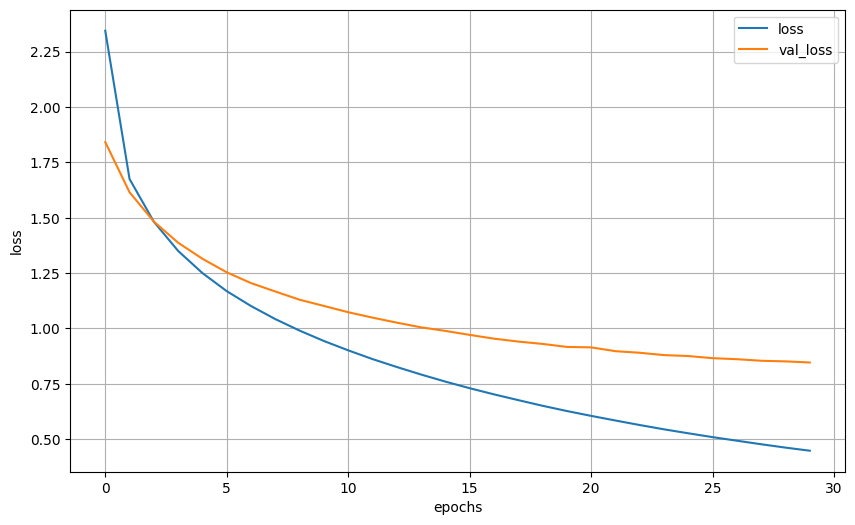

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

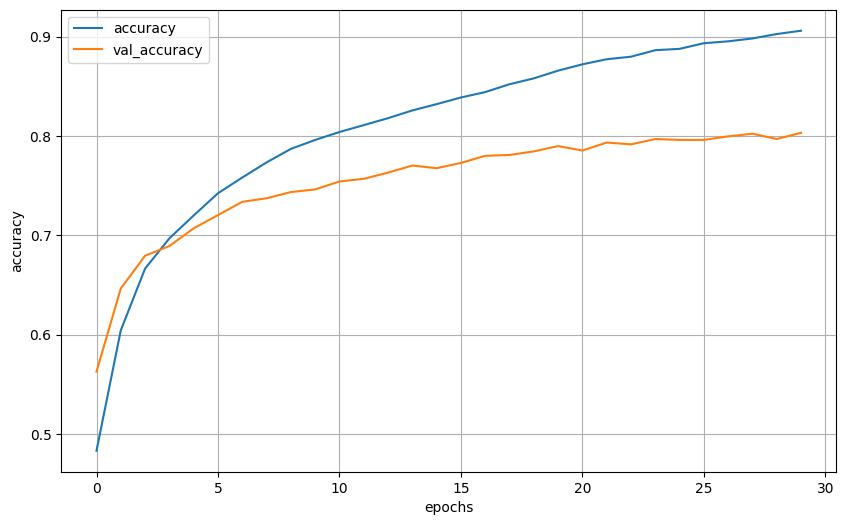

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [17]:
error, accuracy, precision = model.evaluate(X_test, Y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Precision: 0.8774 - accuracy: 0.7825 - loss: 0.9500


In [18]:
print('Error: ', error)
print('Accuracy: ', accuracy)
print('Precision: ', precision)

Error:  0.9221501350402832
Accuracy:  0.7827248573303223
Precision:  0.8723640441894531
